In [1]:
import numpy as np
import qutip
from math import pi
from scipy.linalg import expm
from fmt import format_angle, format_state, format_xyz
from bloch import state_to_bloch, bloch_to_state, xyz_from_bloch, rotation_trace_points
from pauli import sigma_x, sigma_y, sigma_z
from utils import normalize_vector

Задаем углы $\theta$ и $\phi$(начальное положение на сфере), а также вектор $\bar{n}$ и угол $\alpha$(направление и угол вращения)

Получаем оператор поворота кубита на угол $\alpha$ относительно оси вектора $\bar{n}$

Действуем оператором на начальное состояние для получения конечного состояния, отображаем их на сфере Блоха

$\hat{U}(\alpha, \bar{n}) = exp({i\frac{\alpha}{2}(n_x\hat{\sigma_x} + n_y\hat{\sigma_z} + n_y\hat{\sigma_z})})$

$\ket{\psi} = cos(\frac{\theta}{2})\ket{0} + e^{i\phi}sin(\frac{\theta}{2})\ket{1}$

In [2]:
start_theta = pi/4
start_phi = pi/2
n = np.array([0, 1, 0])
alpha = -3*pi/2

In [3]:
n = normalize_vector(n)
nx = n[0]
ny = n[1]
nz = n[2]
U = expm(-1j*alpha/2*(nx*sigma_x + ny*sigma_y + nz*sigma_z))

start_state = bloch_to_state(start_theta, start_phi)
end_state = np.dot(U, start_state)

In [4]:
theta, phi = state_to_bloch(start_state)
start_point = xyz_from_bloch(theta, phi)
print('Start state')
print(f'{format_state(start_state)}: theta = {format_angle(theta)}, phi = {format_angle(phi)}')
print(f'(x, y, z) = {format_xyz(*start_point)}')
print()

print('End state')
theta, phi = state_to_bloch(end_state)
end_point = xyz_from_bloch(theta, phi)
print(f'{format_state(end_state)}: theta = {format_angle(theta)}, phi = {format_angle(phi)}')
print(f'(x, y, z) = {format_xyz(*end_point)}')

Start state
[(0.924+0j), 0.383j]: theta = 0.25pi, phi = 0.5pi
(x, y, z) = (0.0, 0.707, 0.707)

End state
[(-0.653+0.271j), (-0.653-0.271j)]: theta = 0.5pi, phi = -1.75pi
(x, y, z) = (0.707, 0.707, -0.0)


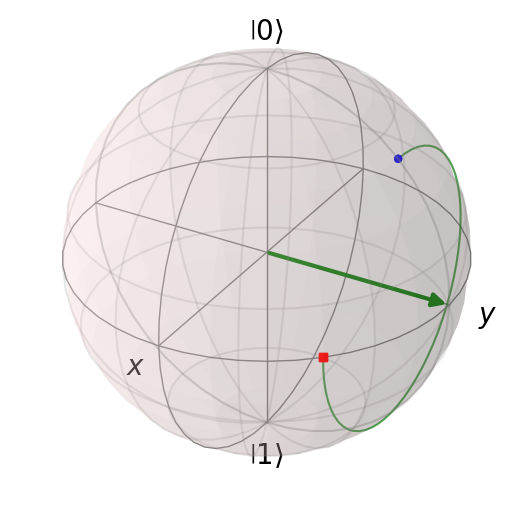

In [6]:
b = qutip.Bloch()
b.add_points(start_point)
b.add_points(end_point)
b.add_vectors(n)
if not np.array_equal(start_point, end_point):
    rotation_points = rotation_trace_points(n, start_point, end_point, alpha)
    b.add_points(list(zip(*rotation_points)), meth='l', alpha=0.7)
b.show()